# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [10]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Let us load the mnist dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [14]:
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [15]:
xin = Input(shape=(784))
res = Dense(10,activation='softmax')(xin)

mynet = Model(inputs=xin,outputs=res)

In [16]:
mynet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.


In [17]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the trianing set. 

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [18]:
mynet.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4720 - accuracy: 0.8759 - val_loss: 0.3103 - val_accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9157 - val_loss: 0.2840 - val_accuracy: 0.9225
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9206 - val_loss: 0.2726 - val_accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9234 - val_loss: 0.2679 - val_accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9254 - val_loss: 0.2671 - val_accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2619 - accuracy: 0.9272 - val_loss: 0.2711 - val_accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9277 - val_loss: 0.2673 - val_accuracy:

In [19]:
xin = Input(shape=(784))
x = Dense(128,activation='relu')(xin)
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [20]:
mynet2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2589 - accuracy: 0.9265 - val_loss: 0.1381 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9661 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0874 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.1022 - val_accuracy: 0.9694
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0722 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0730 - val_accuracy:

An amazing improvement. WOW!

# Exercises

1.   Add additional Dense layers and check the performance of the network
2.   Replace 'relu' with different activation functions
3. Adapt the network to work with the so called sparse_categorical_crossentropy
4. the fit function return a history of training, with temporal sequences for all different metrics. Make a plot.



# 1

In [23]:
xin = Input(shape=(784))
x = Dense(128,activation='relu')(xin)
x = Dense(128,activation='relu')(x)
x = Dense(128,activation='relu')(x)
res = Dense(10,activation='softmax')(x)

mynet3 = Model(inputs=xin,outputs=res)

In [24]:
mynet3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [25]:
mynet3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

mynet3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2244 - accuracy: 0.9327 - val_loss: 0.1044 - val_accuracy: 0.9655
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1017 - accuracy: 0.9694 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.0877 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0939 - val_accuracy: 0.9698
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0779 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0860 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0784 - val_accuracy:

# 2

In [26]:
# using sigmoid activation

xin = Input(shape=(784))
x = Dense(128,activation='sigmoid')(xin)
res = Dense(10,activation='softmax')(x)

mynet4 = Model(inputs=xin,outputs=res)

mynet4.summary()

mynet4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

mynet4.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3950 - accuracy: 0.8973 - val_loss: 0.2272 - val_accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1954 - accuracy: 0.9434 - val_loss: 0.1627 - val_accuracy: 0.9532
Epoch 3/10
1875/1875 [=======

In [27]:
# using tanh activation

xin = Input(shape=(784))
x = Dense(128,activation='tanh')(xin)
res = Dense(10,activation='softmax')(x)

mynet4 = Model(inputs=xin,outputs=res)

mynet4.summary()

mynet4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

mynet4.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2866 - accuracy: 0.9178 - val_loss: 0.1694 - val_accuracy: 0.9488
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1382 - accuracy: 0.9596 - val_loss: 0.1192 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [=======

In [28]:
# using linear activation

xin = Input(shape=(784))
x = Dense(128,activation='linear')(xin)
res = Dense(10,activation='softmax')(x)

mynet4 = Model(inputs=xin,outputs=res)

mynet4.summary()

mynet4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

mynet4.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3581 - accuracy: 0.8965 - val_loss: 0.3143 - val_accuracy: 0.9056
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2987 - accuracy: 0.9171 - val_loss: 0.2800 - val_accuracy: 0.9217
Epoch 3/10
1875/1875 [=======

# 3

In [29]:
# using sparse_categorical_crossentropy

xin = Input(shape=(784))
x = Dense(128,activation='linear')(xin)
res = Dense(10,activation='softmax')(x)

mynet5 = Model(inputs=xin,outputs=res)

mynet5.summary()

mynet5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

fit_output = mynet5.fit(x_train, y_train, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test))

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.8964 - val_loss: 0.3123 - val_accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2982 - accuracy: 0.9167 - val_loss: 0.2967 - val_accuracy: 0.9184
Epoch 3/10
1875/1875 [=======

# 4

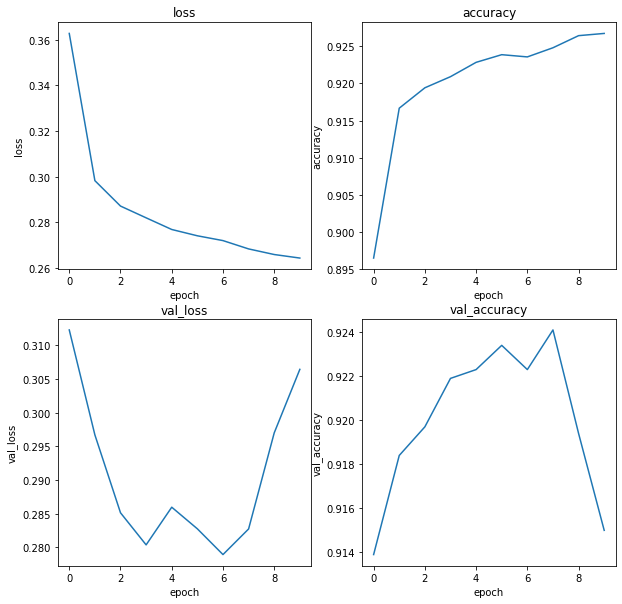

In [30]:
keys = fit_output.history.keys()

# plot of the different metrics
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i,k in enumerate(keys):
    plt.subplot(2,2,i+1)
    plt.plot(fit_output.history[k])
    plt.title(k)
    plt.xlabel('epoch')
    plt.ylabel(k)